In [1]:
# import the main libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
old = gpd.read_file("Data/NSIDC_SeaIceExtent/Sea_Ice_Extents.geojson")

# export to geojsson

old.to_file("sea_ice.shp")

/tmp/ipykernel_63/3367678234.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  old.to_file("sea_ice.shp")


In [4]:
old.head()

,objectid,name,analysisdate,month,year,SHAPE_Length,SHAPE_Area,geometry
0,1,197811,1978-11-01T00:00:00,11,1978,2665.940717,5860.240913,"MULTIPOLYGON (((143.393 49.073, 143.216 48.270..."
1,2,197812,1978-12-01T00:00:00,12,1978,3033.019146,6265.555672,"MULTIPOLYGON (((141.613 44.384, 141.551 43.992..."
2,3,197901,1979-01-01T00:00:00,1,1979,3178.760589,6509.636565,"MULTIPOLYGON (((119.055 38.246, 119.120 38.065..."
3,4,197902,1979-02-01T00:00:00,2,1979,3235.443751,6636.114144,"MULTIPOLYGON (((121.608 38.771, 121.663 38.587..."
4,5,197903,1979-03-01T00:00:00,3,1979,3234.851666,6644.073562,"MULTIPOLYGON (((118.301 38.268, 118.369 38.088..."


In [7]:
from shapely.geometry import Polygon, MultiPolygon


def groupby_multipoly(df, by, aggfunc="first"):
    data = df.drop(labels=df.geometry.name, axis=1)
    aggregated_data = data.groupby(by=by).agg(aggfunc)

    # Process spatial component
    def merge_geometries(block):
        return MultiPolygon(block.values)

    g = df.groupby(by=by, group_keys=False)[df.geometry.name].agg(
        merge_geometries
    )

    # Aggregate
    aggregated_geometry = gpd.GeoDataFrame(g, geometry=df.geometry.name, crs=df.crs)
    # Recombine
    aggregated = aggregated_geometry.join(aggregated_data)
    return aggregated

In [2]:
old = gpd.read_file("Data/NSIDC_SeaIceExtent/Sea_Ice_Extents.geojson")

In [3]:
old

,objectid,name,analysisdate,month,year,SHAPE_Length,SHAPE_Area,geometry
0,1,197811,1978-11-01T00:00:00,11,1978,2665.940717,5860.240913,"MULTIPOLYGON (((143.393 49.073, 143.216 48.270..."
1,2,197812,1978-12-01T00:00:00,12,1978,3033.019146,6265.555672,"MULTIPOLYGON (((141.613 44.384, 141.551 43.992..."
2,3,197901,1979-01-01T00:00:00,1,1979,3178.760589,6509.636565,"MULTIPOLYGON (((119.055 38.246, 119.120 38.065..."
3,4,197902,1979-02-01T00:00:00,2,1979,3235.443751,6636.114144,"MULTIPOLYGON (((121.608 38.771, 121.663 38.587..."
4,5,197903,1979-03-01T00:00:00,3,1979,3234.851666,6644.073562,"MULTIPOLYGON (((118.301 38.268, 118.369 38.088..."
...,...,...,...,...,...,...,...,...
434,435,201503,2015-03-01T00:00:00,3,2015,3095.138796,6216.510274,"MULTIPOLYGON (((125.259 38.969, 125.300 38.783..."
435,436,201504,2015-04-01T00:00:00,4,2015,3028.573689,6130.483827,"MULTIPOLYGON (((125.259 38.969, 125.300 38.783..."
436,437,201505,2015-05-01T00:00:00,5,2015,2812.741868,5920.578131,"MULTIPOLYGON (((144.372 44.305, 144.328 44.110..."
437,438,201506,2015-06-01T00:00:00,6,2015,2734.209098,5529.887519,"MULTIPOLYGON (((143.545 47.014, 143.502 46.816..."


In [6]:
old.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   objectid      439 non-null    int64   
 1   name          439 non-null    object  
 2   analysisdate  439 non-null    object  
 3   month         439 non-null    int64   
 4   year          439 non-null    int64   
 5   SHAPE_Length  439 non-null    float64 
 6   SHAPE_Area    439 non-null    float64 
 7   geometry      439 non-null    geometry
dtypes: float64(2), geometry(1), int64(3), object(2)
memory usage: 27.6+ KB


<AxesSubplot:>

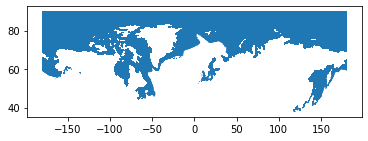

In [7]:
old.plot()


In [5]:
old.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

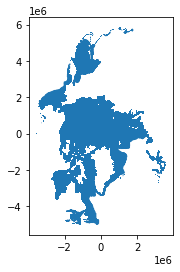

In [6]:
old.to_crs(3413, inplace=True)
old.plot()

In [7]:
old.crs

<Projected CRS: EPSG:3413>
Name: WGS 84 / NSIDC Sea Ice Polar Stereographic North
Axis Info [cartesian]:
- X[south]: Easting (metre)
- Y[south]: Northing (metre)
Area of Use:
- name: Northern hemisphere - north of 60°N onshore and offshore, including Arctic.
- bounds: (-180.0, 60.0, 180.0, 90.0)
Coordinate Operation:
- name: US NSIDC Sea Ice polar stereographic north
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# loop through the files

path = 'Data/NSIDC_SeaIceExtent/unzipped'

#os.chdir(path)

for filename in os.listdir(path):
    f = os.path.join(path, filename)
    if os.path.splitext(f)[-1] == ".shp": # check if it's a .nc file
        df = gpd.read_file(f)
        s = filename
        year = s[9:13] # store the year info from the filename
        month = s[13:15] #store the month info from the filename
        name = s[9:15]
        print(s)        
        df["SHAPE_Area"] = df["geometry"].area/ 10**6   # add the polygon area
        df["dummy"] = 1                                 # create a dummy column to group by on
        df = groupby_multipoly(df, by="dummy")          # convert polygons to multipolygons
        df["month"] = month                             # add the month info as a new column
        df["year"] = year                               # add the year info as a new column
        df['name'] = name
        df['month']= df.month.astype(int)               # change data type to integer
        df['year'] = df.year.astype(int)                # change data type to integer

        df.to_crs(epsg=3413, inplace=True)  #change crs to join to the 'old' geojson
        old = pd.concat([old, df ], ignore_index=True, sort=False)
        
          

extent_N_201601_polygon_v3.0.shp
extent_N_201602_polygon_v3.0.shp
extent_N_201603_polygon_v3.0.shp
extent_N_201604_polygon_v3.0.shp
extent_N_201605_polygon_v3.0.shp
extent_N_201606_polygon_v3.0.shp
extent_N_201607_polygon_v3.0.shp
extent_N_201608_polygon_v3.0.shp
extent_N_201609_polygon_v3.0.shp
extent_N_201610_polygon_v3.0.shp
extent_N_201611_polygon_v3.0.shp
extent_N_201612_polygon_v3.0.shp
extent_N_201701_polygon_v3.0.shp
extent_N_201702_polygon_v3.0.shp
extent_N_201703_polygon_v3.0.shp
extent_N_201704_polygon_v3.0.shp
extent_N_201705_polygon_v3.0.shp
extent_N_201706_polygon_v3.0.shp
extent_N_201707_polygon_v3.0.shp
extent_N_201708_polygon_v3.0.shp
extent_N_201709_polygon_v3.0.shp
extent_N_201710_polygon_v3.0.shp
extent_N_201711_polygon_v3.0.shp
extent_N_201712_polygon_v3.0.shp
extent_N_201801_polygon_v3.0.shp
extent_N_201802_polygon_v3.0.shp
extent_N_201803_polygon_v3.0.shp
extent_N_201804_polygon_v3.0.shp
extent_N_201805_polygon_v3.0.shp
extent_N_201806_polygon_v3.0.shp
extent_N_2

In [18]:
old[old['year']==2014]

,objectid,name,analysisdate,month,year,SHAPE_Length,SHAPE_Area,geometry,FID
420,421.0,201401,2014-01-01T00:00:00,1,2014,3118.911185,6089.772722,"MULTIPOLYGON (((125.417 39.375, 125.458 39.188...",NaN
421,422.0,201402,2014-02-01T00:00:00,2,2014,3165.495740,6170.393339,"MULTIPOLYGON (((125.417 39.375, 125.458 39.188...",NaN
422,423.0,201403,2014-03-01T00:00:00,3,2014,3192.078061,6251.322335,"MULTIPOLYGON (((125.417 39.375, 125.458 39.188...",NaN
423,424.0,201404,2014-04-01T00:00:00,4,2014,3121.445456,6203.741531,"MULTIPOLYGON (((129.464 40.558, 129.489 40.368...",NaN
424,425.0,201405,2014-05-01T00:00:00,5,2014,2809.519445,5972.819989,"MULTIPOLYGON (((144.372 44.305, 144.328 44.110...",NaN
425,426.0,201406,2014-06-01T00:00:00,6,2014,2761.629655,5609.117016,"MULTIPOLYGON (((143.393 49.073, 143.348 48.872...",NaN
426,427.0,201407,2014-07-01T00:00:00,7,2014,2355.295946,4884.152138,"MULTIPOLYGON (((131.511 71.204, 131.594 70.756...",NaN
427,428.0,201408,2014-08-01T00:00:00,8,2014,1906.583408,4259.352852,"MULTIPOLYGON (((131.553 70.980, 131.594 70.756...",NaN
428,429.0,201409,2014-09-01T00:00:00,9,2014,1693.038172,3910.903814,"MULTIPOLYGON (((131.553 70.980, 131.594 70.756...",NaN
429,430.0,201410,2014-10-01T00:00:00,10,2014,2245.083857,4912.905432,"MULTIPOLYGON (((141.953 53.146, 141.789 52.319...",NaN


In [17]:
old[old['year']==2015]

,objectid,name,analysisdate,month,year,SHAPE_Length,SHAPE_Area,geometry,FID
432,433.0,201501,2015-01-01T00:00:00,1,2015,3080.044363,6098.244974,"MULTIPOLYGON (((-46.637 81.932, -46.685 82.162...",NaN
433,434.0,201502,2015-02-01T00:00:00,2,2015,3117.740515,6243.358159,"MULTIPOLYGON (((125.259 38.969, 125.300 38.783...",NaN
434,435.0,201503,2015-03-01T00:00:00,3,2015,3095.138796,6216.510274,"MULTIPOLYGON (((125.259 38.969, 125.300 38.783...",NaN
435,436.0,201504,2015-04-01T00:00:00,4,2015,3028.573689,6130.483827,"MULTIPOLYGON (((125.259 38.969, 125.300 38.783...",NaN
436,437.0,201505,2015-05-01T00:00:00,5,2015,2812.741868,5920.578131,"MULTIPOLYGON (((144.372 44.305, 144.328 44.110...",NaN
437,438.0,201506,2015-06-01T00:00:00,6,2015,2734.209098,5529.887519,"MULTIPOLYGON (((143.545 47.014, 143.502 46.816...",NaN
438,439.0,201507,2015-07-01T00:00:00,7,2015,2417.127344,4970.616419,"MULTIPOLYGON (((143.645 51.537, 143.596 51.333...",NaN


In [19]:
old[old['year']==2020]

,objectid,name,analysisdate,month,year,SHAPE_Length,SHAPE_Area,geometry,FID
487,NaN,202001,NaN,1,2020,NaN,625.0,"MULTIPOLYGON (((999978.741 5849875.637, 102497...",0.0
488,NaN,202002,NaN,2,2020,NaN,625.0,"MULTIPOLYGON (((999978.741 5849875.637, 102497...",0.0
489,NaN,202003,NaN,3,2020,NaN,1250.0,"MULTIPOLYGON (((999978.741 5849875.637, 104997...",0.0
490,NaN,202004,NaN,4,2020,NaN,5625.0,"MULTIPOLYGON (((999978.741 5849875.637, 104997...",0.0
491,NaN,202005,NaN,5,2020,NaN,625.0,"MULTIPOLYGON (((-649986.213 4924895.539, -6249...",0.0
492,NaN,202006,NaN,6,2020,NaN,625.0,"MULTIPOLYGON (((-549988.348 4399906.785, -5249...",0.0
493,NaN,202007,NaN,7,2020,NaN,1875.0,"MULTIPOLYGON (((-474989.942 4174911.595, -4499...",0.0
494,NaN,202008,NaN,8,2020,NaN,625.0,"MULTIPOLYGON (((-174996.287 5124891.257, -1499...",0.0
495,NaN,202009,NaN,9,2020,NaN,625.0,"MULTIPOLYGON (((-299993.637 4949895.011, -2749...",0.0
496,NaN,202010,NaN,10,2020,NaN,1250.0,"MULTIPOLYGON (((-549988.349 4349907.854, -5249...",0.0


In [11]:
old.head(30)

,objectid,name,analysisdate,month,year,SHAPE_Length,SHAPE_Area,geometry,FID
0,1.0,197811,1978-11-01T00:00:00,11,1978,2665.940717,5860.240913,"MULTIPOLYGON (((143.393 49.073, 143.216 48.270...",NaN
1,2.0,197812,1978-12-01T00:00:00,12,1978,3033.019146,6265.555672,"MULTIPOLYGON (((141.613 44.384, 141.551 43.992...",NaN
2,3.0,197901,1979-01-01T00:00:00,1,1979,3178.760589,6509.636565,"MULTIPOLYGON (((119.055 38.246, 119.120 38.065...",NaN
3,4.0,197902,1979-02-01T00:00:00,2,1979,3235.443751,6636.114144,"MULTIPOLYGON (((121.608 38.771, 121.663 38.587...",NaN
4,5.0,197903,1979-03-01T00:00:00,3,1979,3234.851666,6644.073562,"MULTIPOLYGON (((118.301 38.268, 118.369 38.088...",NaN
5,6.0,197904,1979-04-01T00:00:00,4,1979,3174.392926,6498.146600,"MULTIPOLYGON (((129.440 40.749, 129.464 40.558...",NaN
6,7.0,197905,1979-05-01T00:00:00,5,1979,2940.916687,6263.996519,"MULTIPOLYGON (((140.807 50.518, 140.774 50.314...",NaN
7,8.0,197906,1979-06-01T00:00:00,6,1979,2806.510278,5996.011454,"MULTIPOLYGON (((142.165 50.834, 142.125 50.630...",NaN
8,9.0,197907,1979-07-01T00:00:00,7,1979,2626.530761,5520.893512,"MULTIPOLYGON (((-173.660 66.671, -174.523 66.3...",NaN
9,10.0,197908,1979-08-01T00:00:00,8,1979,2291.473815,4882.415109,"MULTIPOLYGON (((132.173 71.441, 132.207 71.217...",NaN


In [10]:
drop = ['objectid', 'analysisdate', "SHAPE_Length", 'FID']

old.drop(columns = drop, inplace=True)

old.head()

,name,month,year,SHAPE_Area,geometry
0,197811,11,1978,5860.240913,"MULTIPOLYGON (((-675000.000 4575000.000, -6750..."
1,197812,12,1978,6265.555672,"MULTIPOLYGON (((-600000.000 5175000.000, -6000..."
2,197901,1,1979,6509.636565,"MULTIPOLYGON (((1650000.000 5775000.000, 16500..."
3,197902,2,1979,6636.114144,"MULTIPOLYGON (((1375000.000 5775000.000, 13750..."
4,197903,3,1979,6644.073562,"MULTIPOLYGON (((1725000.000 5750000.000, 17250..."


<AxesSubplot:>

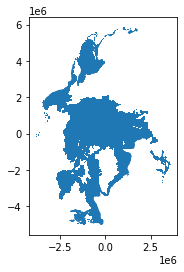

In [13]:
old.plot()

In [12]:

#old_test = old.to_crs(4326)

#old_test.plot()

NameError: name 'old_test' is not defined

In [14]:
# export to geojsson

old.to_file("sea_ice_all3413.geojson", driver='GeoJSON')

In [16]:
from typing import Union, List, Generator
from shapely.geometry import mapping, Polygon, GeometryCollection
from shapely import affinity

def check_crossing(lon1: float, lon2: float, validate: bool = False, dlon_threshold: float = 180.0):
    """
    Assuming a minimum travel distance between two provided longitude coordinates,
    checks if the 180th meridian (antimeridian) is crossed.
    """

    if validate and any([abs(x) > 180.0 for x in [lon1, lon2]]):
        raise ValueError("longitudes must be in degrees [-180.0, 180.0]")   
    return abs(lon2 - lon1) > dlon_threshold

def translate_polygons(geometry_collection: GeometryCollection, 
                       output_format: str = "geojson") -> Generator[
                          Union[List[dict], List[Polygon]], None, None
                       ]:
    
      for polygon in geometry_collection:
            (minx, _, maxx, _) = polygon.bounds
            if minx < -180: geo_polygon = affinity.translate(polygon, xoff = 360)
            elif maxx > 180: geo_polygon = affinity.translate(polygon, xoff = -360)
            else: geo_polygon = polygon
            yield_geojson = output_format == "geojson"
            yield json.dumps(mapping(geo_polygon)) if (yield_geojson) else geo_polygon
            
            

In [19]:
import math
import copy
import json
from typing import Union, List
from shapely.geometry import Polygon, LineString, GeometryCollection
from shapely.ops import split

# https://gist.github.com/PawaritL/ec7136c0b718ca65db6df1c33fd1bb11
#from geopolygon_utils import check_crossing, translate_polygons

def split_polygon(geojson: dict, output_format: str = "geojson", validate: bool = False) -> Union[
    List[dict], List[Polygon], GeometryCollection
    ]:
    """
    Given a GeoJSON representation of a Polygon, returns a collection of
    'antimeridian-safe' constituent polygons split at the 180th meridian, 
    ensuring compliance with GeoJSON standards (https://tools.ietf.org/html/rfc7946#section-3.1.9)
    Assumptions:
      - Any two consecutive points with over 180 degrees difference in
        longitude are assumed to cross the antimeridian
      - The polygon spans less than 360 degrees in longitude (i.e. does not wrap around the globe)
      - However, the polygon may cross the antimeridian on multiple occasions
    Parameters:
        geojson (dict): GeoJSON of input polygon to be split. For example:
                        {
                        "type": "Polygon",
                        "coordinates": [
                          [
                            [179.0, 0.0], [-179.0, 0.0], [-179.0, 1.0],
                            [179.0, 1.0], [179.0, 0.0]
                          ]
                        ]
                        }
        output_format (str): Available options: "geojson", "polygons", "geometrycollection"
                             If "geometrycollection" returns a Shapely GeometryCollection.
                             Otherwise, returns a list of either GeoJSONs or Shapely Polygons
        validate (bool): Checks if all longitudes are within [-180.0, 180.0]
      
    Returns:
        List[dict]/List[Polygon]/GeometryCollection: antimeridian-safe polygon(s)
    """
    output_format = output_format.replace("-", "").strip().lower()
    coords_shift = copy.deepcopy(geojson["coordinates"])
    shell_minx = shell_maxx = None
    split_meridians = set()
    splitter = None

    for ring_index, ring in enumerate(coords_shift):
        if len(ring) < 1: 
            continue
        else:
            ring_minx = ring_maxx = ring[0][0]
            crossings = 0

        for coord_index, (lon, _) in enumerate(ring[1:], start=1):
            lon_prev = ring[coord_index - 1][0] # [0] corresponds to longitude coordinate
            if check_crossing(lon, lon_prev, validate=validate):
                direction = math.copysign(1, lon - lon_prev)
                coords_shift[ring_index][coord_index][0] = lon - (direction * 360.0)
                crossings += 1

            x_shift = coords_shift[ring_index][coord_index][0]
            if x_shift < ring_minx: ring_minx = x_shift
            if x_shift > ring_maxx: ring_maxx = x_shift

        # Ensure that any holes remain contained within the (translated) outer shell
        if (ring_index == 0): # by GeoJSON definition, first ring is the outer shell
            shell_minx, shell_maxx = (ring_minx, ring_maxx)
        elif (ring_minx < shell_minx):
            ring_shift = [[x + 360, y] for (x, y) in coords_shift[ring_index]]
            coords_shift[ring_index] = ring_shift
            ring_minx, ring_maxx = (x + 360 for x in (ring_minx, ring_maxx))
        elif (ring_maxx > shell_maxx):
            ring_shift = [[x - 360, y] for (x, y) in coords_shift[ring_index]]
            coords_shift[ring_index] = ring_shift
            ring_minx, ring_maxx = (x - 360 for x in (ring_minx, ring_maxx))

        if crossings: # keep track of meridians to split on
            if ring_minx < -180: split_meridians.add(-180)
            if ring_maxx > 180: split_meridians.add(180)

    n_splits = len(split_meridians)
    if n_splits > 1:
        raise NotImplementedError(
            """Splitting a Polygon by multiple meridians (MultiLineString) 
               not supported by Shapely"""
        )
    elif n_splits == 1:
        split_lon = next(iter(split_meridians))
        meridian = [[split_lon, -90.0], [split_lon, 90.0]]
        splitter = LineString(meridian)

    shell, *holes = coords_shift if splitter else geojson["coordinates"]
    if splitter: split_polygons = split(Polygon(shell, holes), splitter)
    else: split_polygons = GeometryCollection([Polygon(shell, holes)])
        
    geo_polygons = list(translate_polygons(split_polygons, output_format))  
    if output_format == "geometrycollection": return GeometryCollection(geo_polygons)
    else: return geo_polygons

In [28]:
split_polygon(geojson= json, output_format= "geojson", validate=False)

KeyError: 'coordinates'

In [35]:
json

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {},
   'geometry': {'type': 'Polygon',
    'coordinates': (((1000000.0, 5850000.0),
      (1050000.0, 5850000.0),
      (1050000.0, 5825000.0),
      (1025000.0, 5825000.0),
      (1025000.0, 5775000.0),
      (1050000.0, 5775000.0),
      (1050000.0, 5750000.0),
      (1025000.0, 5750000.0),
      (1025000.0, 5725000.0),
      (1000000.0, 5725000.0),
      (1000000.0, 5750000.0),
      (975000.0, 5750000.0),
      (975000.0, 5800000.0),
      (1000000.0, 5800000.0),
      (1000000.0, 5850000.0)),)},
   'bbox': (975000.0, 5725000.0, 1050000.0, 5850000.0)}],
 'bbox': (975000.0, 5725000.0, 1050000.0, 5850000.0)}

In [42]:
json['features']

[{'id': '0',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'Polygon',
   'coordinates': (((1000000.0, 5850000.0),
     (1050000.0, 5850000.0),
     (1050000.0, 5825000.0),
     (1025000.0, 5825000.0),
     (1025000.0, 5775000.0),
     (1050000.0, 5775000.0),
     (1050000.0, 5750000.0),
     (1025000.0, 5750000.0),
     (1025000.0, 5725000.0),
     (1000000.0, 5725000.0),
     (1000000.0, 5750000.0),
     (975000.0, 5750000.0),
     (975000.0, 5800000.0),
     (1000000.0, 5800000.0),
     (1000000.0, 5850000.0)),)},
  'bbox': (975000.0, 5725000.0, 1050000.0, 5850000.0)}]

In [46]:
type(json['features'])

list

In [44]:
json['features'][:]


[{'id': '0',
  'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'Polygon',
   'coordinates': (((1000000.0, 5850000.0),
     (1050000.0, 5850000.0),
     (1050000.0, 5825000.0),
     (1025000.0, 5825000.0),
     (1025000.0, 5775000.0),
     (1050000.0, 5775000.0),
     (1050000.0, 5750000.0),
     (1025000.0, 5750000.0),
     (1025000.0, 5725000.0),
     (1000000.0, 5725000.0),
     (1000000.0, 5750000.0),
     (975000.0, 5750000.0),
     (975000.0, 5800000.0),
     (1000000.0, 5800000.0),
     (1000000.0, 5850000.0)),)},
  'bbox': (975000.0, 5725000.0, 1050000.0, 5850000.0)}]

In [20]:
shp = gpd.read_file("Data/NSIDC_SeaIceExtent/unzipped/extent_N_201601_polygon_v3.0.shp")
shp

,FID,geometry
0,0,"POLYGON ((1000000.000 5850000.000, 1050000.000..."
1,1,"POLYGON ((1650000.000 5800000.000, 1675000.000..."
2,2,"POLYGON ((700000.000 5775000.000, 750000.000 5..."
3,3,"POLYGON ((1325000.000 5775000.000, 1350000.000..."
4,4,"POLYGON ((1050000.000 5750000.000, 1075000.000..."
...,...,...
129,129,"POLYGON ((-1425000.000 -4750000.000, -1400000...."
130,130,"POLYGON ((-1325000.000 -4775000.000, -1300000...."
131,131,"POLYGON ((-1700000.000 -4800000.000, -1650000...."
132,132,"POLYGON ((-1425000.000 -4850000.000, -1400000...."


In [24]:
# https://gist.github.com/AlexArcPy/2fc9f41ca164f76fcbb30ebca273b59f

import json
import ogr

driver = ogr.GetDriverByName('ESRI Shapefile')
shp_path = "Data/NSIDC_SeaIceExtent/unzipped/extent_N_201601_polygon_v3.0.shp"
data_source = driver.Open(shp_path, 0)

fc = {
    'type': 'FeatureCollection',
    'features': []
    }

lyr = data_source.GetLayer(0)
for feature in lyr:    
    fc['features'].append(feature.ExportToJson(as_object=True))

with open('icejson.json', 'wb') as f:
    json.dump(fc, f)

AttributeError: module 'ogr' has no attribute 'GetDriverByName'

In [23]:
!pip install ogr


     |████████████████████████████████| 76 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 122 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 291 kB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 856 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 4.1 MB/s eta 0:00:011


In [25]:
import geopandas as gpd

gdf = gpd.read_file('Data/NSIDC_SeaIceExtent/unzipped/extent_N_201601_polygon_v3.0.shp')
json = gpd.GeoSeries([gdf.geometry.iloc[0]]).__geo_interface__

In [26]:
json

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {},
   'geometry': {'type': 'Polygon',
    'coordinates': (((1000000.0, 5850000.0),
      (1050000.0, 5850000.0),
      (1050000.0, 5825000.0),
      (1025000.0, 5825000.0),
      (1025000.0, 5775000.0),
      (1050000.0, 5775000.0),
      (1050000.0, 5750000.0),
      (1025000.0, 5750000.0),
      (1025000.0, 5725000.0),
      (1000000.0, 5725000.0),
      (1000000.0, 5750000.0),
      (975000.0, 5750000.0),
      (975000.0, 5800000.0),
      (1000000.0, 5800000.0),
      (1000000.0, 5850000.0)),)},
   'bbox': (975000.0, 5725000.0, 1050000.0, 5850000.0)}],
 'bbox': (975000.0, 5725000.0, 1050000.0, 5850000.0)}